In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl
import nbodykit.lab as nb
import yaml
import io

plt.style.use('light_mode')
with open("../config.yaml", 'r') as stream:
    config = yaml.safe_load(stream)


## Isolated Replacement Power Spectra

### Import Files

In [69]:
power_file = "/global/cscratch1/sd/james12/NEXUS_analysis/power_spectra/heavy_halos/iso_cross_power"

heavy_dm_pk_all_iso = (nb.FFTPower.load(power_file + "_pk_all_dm.json")).power
heavy_pk_clus_iso = (nb.FFTPower.load(power_file + "_pk_clus.json")).power
heavy_pk_fil_iso = (nb.FFTPower.load(power_file + "_pk_fil.json")).power
heavy_pk_wall_iso = (nb.FFTPower.load(power_file + "_pk_wall.json")).power
heavy_full_pk_all_iso = (nb.FFTPower.load(power_file + "_pk_all_full.json")).power

power_file = "/global/cscratch1/sd/james12/NEXUS_analysis/power_spectra/light_halos/iso_cross_power"

light_pk_clus_iso = (nb.FFTPower.load(power_file + "_pk_clus.json")).power
light_dm_pk_all_iso = (nb.FFTPower.load(power_file + "_pk_all_dm.json")).power
light_pk_clus_iso = (nb.FFTPower.load(power_file + "_pk_clus.json")).power
light_pk_fil_iso = (nb.FFTPower.load(power_file + "_pk_fil.json")).power
light_pk_wall_iso = (nb.FFTPower.load(power_file + "_pk_wall.json")).power
light_full_pk_all_iso = (nb.FFTPower.load(power_file + "_pk_all_full.json")).power


power_file = "/global/cscratch1/sd/james12/NEXUS_analysis/power_spectra/ultralight_halos/iso_cross_power"

ultralight_pk_clus_iso = (nb.FFTPower.load(power_file + "_pk_clus.json")).power
ultralight_dm_pk_all_iso = (nb.FFTPower.load(power_file + "_pk_all_dm.json")).power
ultralight_pk_clus_iso = (nb.FFTPower.load(power_file + "_pk_clus.json")).power
ultralight_pk_fil_iso = (nb.FFTPower.load(power_file + "_pk_fil.json")).power
ultralight_pk_wall_iso = (nb.FFTPower.load(power_file + "_pk_wall.json")).power
ultralight_full_pk_all_iso = (nb.FFTPower.load(power_file + "_pk_all_full.json")).power


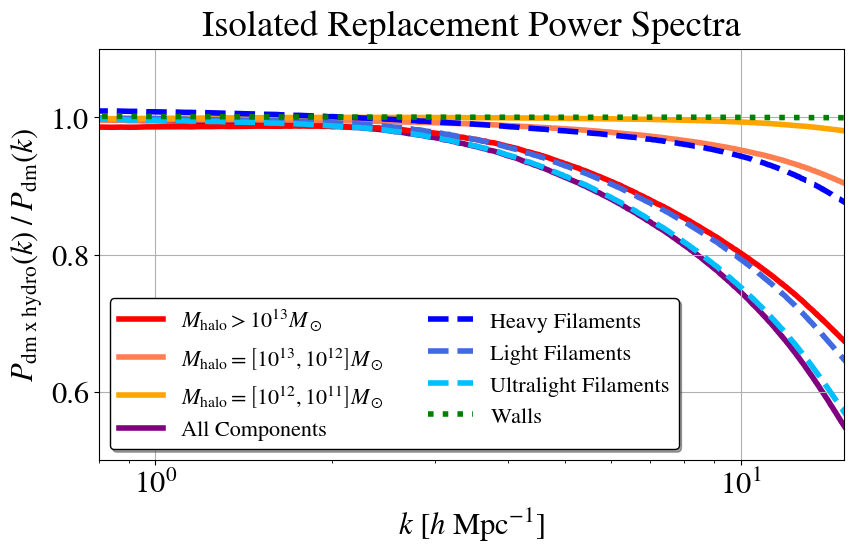

In [83]:
f, axes = plt.subplots(1,1, figsize=(9,6))

#-----------
# CLUSTERS
#-----------
y = (((heavy_pk_clus_iso['power'].real - heavy_pk_clus_iso.attrs['shotnoise'])*1e-9) / 
     ((heavy_dm_pk_all_iso['power'].real - heavy_dm_pk_all_iso.attrs['shotnoise'])*1e-9) )
axes.plot((heavy_pk_clus_iso['k']) * 1e3, y, label='$M_{\\rm halo} > 10^{13} M_\odot$', color="red", linestyle="-", linewidth=4)

y = (((light_pk_clus_iso['power'].real - light_pk_clus_iso.attrs['shotnoise'])*1e-9) / 
     ((heavy_dm_pk_all_iso['power'].real - heavy_dm_pk_all_iso.attrs['shotnoise'])*1e-9) )
axes.plot((heavy_pk_clus_iso['k']) * 1e3, y, label='$M_{\\rm halo} = \\left[10^{13}, 10^{12}\\right] M_\odot$', color="coral", linestyle="-", linewidth=4)

y = (((ultralight_pk_clus_iso['power'].real - ultralight_pk_clus_iso.attrs['shotnoise'])*1e-9) / 
     ((heavy_dm_pk_all_iso['power'].real - heavy_dm_pk_all_iso.attrs['shotnoise'])*1e-9) )
axes.plot((heavy_pk_clus_iso['k']) * 1e3, y, label='$M_{\\rm halo} = \\left[10^{12}, 10^{11}\\right] M_\odot$', color="orange", linestyle="-", linewidth=4)

# axes.plot([],[], linewidth=0, label=" ")

y = (((heavy_full_pk_all_iso['power'].real - heavy_full_pk_all_iso.attrs['shotnoise'])*1e-9) / 
     ((heavy_dm_pk_all_iso['power'].real - heavy_dm_pk_all_iso.attrs['shotnoise'])*1e-9) )
axes.plot((heavy_pk_clus_iso['k']) * 1e3, y, color="purple",label="All Components", linestyle="-", linewidth=4,zorder=0)

#-----------
# FILAMENTS
#-----------

y = (((heavy_pk_fil_iso['power'].real - heavy_pk_fil_iso.attrs['shotnoise'])*1e-9) / 
     ((heavy_dm_pk_all_iso['power'].real - heavy_dm_pk_all_iso.attrs['shotnoise'])*1e-9) )
axes.plot((heavy_pk_clus_iso['k']) * 1e3, y, label='Heavy Filaments', color="blue", linestyle="--", linewidth=4)

y = (((light_pk_fil_iso['power'].real - light_pk_fil_iso.attrs['shotnoise'])*1e-9) / 
     ((heavy_dm_pk_all_iso['power'].real - heavy_dm_pk_all_iso.attrs['shotnoise'])*1e-9) )
axes.plot((heavy_pk_clus_iso['k']) * 1e3, y, label='Light Filaments', color="royalblue", linestyle="--", linewidth=4)

y = (((ultralight_pk_fil_iso['power'].real - ultralight_pk_fil_iso.attrs['shotnoise'])*1e-9) / 
     ((heavy_dm_pk_all_iso['power'].real - heavy_dm_pk_all_iso.attrs['shotnoise'])*1e-9) )
axes.plot((heavy_pk_clus_iso['k']) * 1e3, y, label='Ultralight Filaments', color="deepskyblue", linestyle="--", linewidth=4)

#-----------
#  WALLS
#-----------

y = (((heavy_pk_wall_iso['power'].real - heavy_pk_wall_iso.attrs['shotnoise'])*1e-9) / 
     ((heavy_dm_pk_all_iso['power'].real - heavy_dm_pk_all_iso.attrs['shotnoise'])*1e-9) )
axes.plot((heavy_pk_clus_iso['k']) * 1e3, y, label='Walls', color="green", linestyle=":", linewidth=4)





axes.semilogx()
axes.grid()
axes.set_xlim(0.8e0, 1.5e1)
axes.set_ylim(0.5, 1.1)
# axes.set_ylim(-0.8, 0.1)
axes.axhline(y = 0, color = 'gray', linestyle = '--')
# axes.set_title("Isolated Replacement")
axes.set_xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]",fontsize=22)
axes.set_ylabel(r"$P_{\mathrm{dm \; x \; hydro}}(k) \; / \; P_{\mathrm{dm}}(k) $", fontsize=22)
axes.legend(fontsize=16, shadow=True, ncol=2, edgecolor="black")
axes.set_title("Isolated Replacement Power Spectra", pad=10)
f.tight_layout()
plt.savefig("Figures/Isolated_Replacement_Power_Spectra.png", dpi=300, bbox_inches="tight")




## Incremental Replacement Power Spectra

### Import Data

In [84]:
power_file = "/global/cscratch1/sd/james12/NEXUS_analysis/power_spectra/heavy_halos/inc_cross_power"

heavy_pk_clus = (nb.FFTPower.load(power_file + "_pk_clus.json")).power
heavy_dm_pk_all = (nb.FFTPower.load(power_file + "_pk_all_dm.json")).power
heavy_pk_clus = (nb.FFTPower.load(power_file + "_pk_clus.json")).power
heavy_pk_fil = (nb.FFTPower.load(power_file + "_pk_fil.json")).power
heavy_pk_wall = (nb.FFTPower.load(power_file + "_pk_wall.json")).power
heavy_full_pk_all = (nb.FFTPower.load(power_file + "_pk_all_full.json")).power

power_file = "/global/cscratch1/sd/james12/NEXUS_analysis/power_spectra/both_halos/inc_cross_power"

both_pk_clus = (nb.FFTPower.load(power_file + "_pk_clus.json")).power
both_pk_all = (nb.FFTPower.load(power_file + "_pk_all_dm.json")).power
both_pk_clus = (nb.FFTPower.load(power_file + "_pk_clus.json")).power
both_pk_fil = (nb.FFTPower.load(power_file + "_pk_fil.json")).power
both_pk_wall = (nb.FFTPower.load(power_file + "_pk_wall.json")).power
both_full_pk_all = (nb.FFTPower.load(power_file + "_pk_all_full.json")).power

power_file = "/global/cscratch1/sd/james12/NEXUS_analysis/power_spectra/all_halos/inc_cross_power"

all_dm_pk_all = (nb.FFTPower.load(power_file + "_pk_all_dm.json")).power
all_pk_clus = (nb.FFTPower.load(power_file + "_pk_clus.json")).power
all_pk_fil = (nb.FFTPower.load(power_file + "_pk_fil.json")).power
all_pk_wall = (nb.FFTPower.load(power_file + "_pk_wall.json")).power
all_full_pk_all = (nb.FFTPower.load(power_file + "_pk_all_full.json")).power





In [96]:
red,blue,green,purple = ['orangered', 'dodgerblue', 'darkgreen', 'indigo']

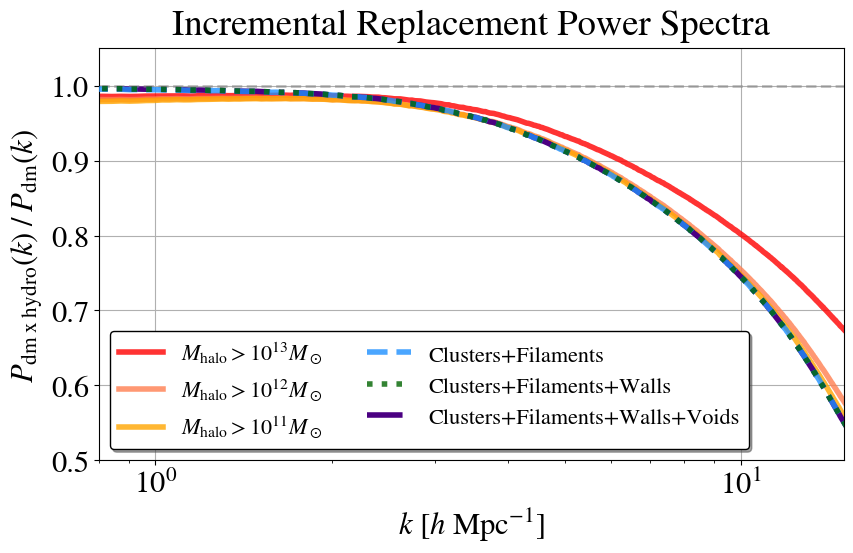

In [99]:
f, axes = plt.subplots(1,1, figsize=(9,6))


#-----------
# CLUSTERS
#-----------
y = (((heavy_pk_clus['power'].real - heavy_pk_clus.attrs['shotnoise'])*1e-9) / 
     ((all_dm_pk_all['power'].real - all_dm_pk_all.attrs['shotnoise'])*1e-9))
axes.plot((all_pk_clus['k']) * 1e3, y ,label='$M_{\\rm halo} > 10^{13} M_\odot$', 
          color="red", alpha=0.8,linestyle="-", linewidth=4)

y = (((both_pk_clus['power'].real - both_pk_clus.attrs['shotnoise'])*1e-9) / 
     ((all_dm_pk_all['power'].real - all_dm_pk_all.attrs['shotnoise'])*1e-9))
axes.plot((all_pk_clus['k']) * 1e3, y ,label='$M_{\\rm halo} > 10^{12} M_\odot$', 
          color="coral", alpha=0.8,linestyle="-", linewidth=4)

y = (((all_pk_clus['power'].real - all_pk_clus.attrs['shotnoise'])*1e-9) / 
     ((all_dm_pk_all['power'].real - all_dm_pk_all.attrs['shotnoise'])*1e-9))
axes.plot((all_pk_clus['k']) * 1e3, y ,label='$M_{\\rm halo} > 10^{11} M_\odot$', 
          color="orange", alpha=0.8,linestyle="-", linewidth=4)

#-----------
# FILAMENTS
#-----------

# y = (((heavy_pk_fil['power'].real - heavy_pk_fil.attrs['shotnoise'])*1e-9) / 
#     ((all_dm_pk_all['power'].real - all_dm_pk_all.attrs['shotnoise'])*1e-9))
# axes.plot((all_pk_fil['k']) * 1e3, y, label='Clusters+Filaments', 
#           color="blue", alpha=0.8, linestyle="--",linewidth=4)

# y = (((both_pk_fil['power'].real - both_pk_fil.attrs['shotnoise'])*1e-9) / 
#     ((all_dm_pk_all['power'].real - all_dm_pk_all.attrs['shotnoise'])*1e-9))
# axes.plot((all_pk_fil['k']) * 1e3, y, label='Clusters+Filaments', 
#           color="royalblue", alpha=0.8, linestyle="--",linewidth=4)

y = (((all_pk_fil['power'].real - all_pk_fil.attrs['shotnoise'])*1e-9) / 
    ((all_dm_pk_all['power'].real - all_dm_pk_all.attrs['shotnoise'])*1e-9))
axes.plot((all_pk_fil['k']) * 1e3, y, label='Clusters+Filaments', 
          color=blue, alpha=0.8, linestyle="--",linewidth=4, zorder=9)

#-----------
#  WALLS
#-----------

y = (((all_pk_wall['power'].real - all_pk_wall.attrs['shotnoise'])*1e-9) / 
    ((all_dm_pk_all['power'].real - all_dm_pk_all.attrs['shotnoise'])*1e-9))
axes.plot((all_pk_wall['k']) * 1e3, y ,label='Clusters+Filaments+Walls', 
          color=green, alpha=0.8, linestyle=":",linewidth=4, zorder=10)

#-----------
#  VOIDS
#-----------

y = (((all_full_pk_all['power'].real - all_full_pk_all.attrs['shotnoise'])*1e-9) / 
     ((all_dm_pk_all['power'].real - all_dm_pk_all.attrs['shotnoise'])*1e-9))
axes.plot((all_full_pk_all['k']) * 1e3, y,label='Clusters+Filaments+Walls+Voids', 
          color=purple,linestyle="-.",linewidth=4) 

#Illustris units are kpc we need to convert to Mpc

axes.semilogx()
# axes.semilogy()
axes.grid()
axes.set_xlim(0.8e0, 1.5e1)
axes.set_ylim(0.5, 1.05)
axes.axhline(y = 1, color = 'gray', linestyle = '--',linewidth = 2, alpha = 0.5)
# axes.set_title("Isolated Replacement")
axes.set_xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]",fontsize=22)
axes.set_ylabel(r"$P_{\mathrm{dm \; x \; hydro}}(k) \; / \; P_{\mathrm{dm}}(k) $ ", fontsize=22)
axes.legend(fontsize=16, shadow=True, ncol=2, edgecolor="black")
axes.set_title("Incremental Replacement Power Spectra", pad=10)
f.tight_layout()
# plt.savefig("Figures/Incremental_Replacement_Power_Spectra.png", dpi=300, bbox_inches="tight")




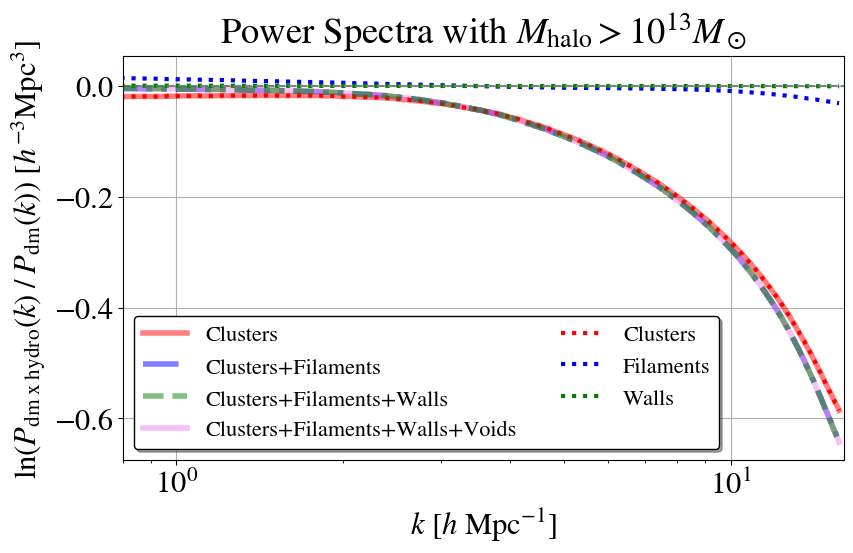

In [39]:
f, axes = plt.subplots(1,1, figsize=(9,6))


axes.plot((pk_clus['k']) * 1e3, np.log((((pk_clus['power'].real - pk_clus.attrs['shotnoise'])*1e-9) / 
                                       ((dm_pk_all['power'].real - dm_pk_all.attrs['shotnoise'])*1e-9))),
                                       label='Clusters', color="red", alpha=0.5,linestyle="-", linewidth=4)

axes.plot((pk_fil['k']) * 1e3, np.log((((pk_fil['power'].real - pk_fil.attrs['shotnoise'])*1e-9) / 
                                      ((dm_pk_all['power'].real - dm_pk_all.attrs['shotnoise'])*1e-9))),
                                       label='Clusters+Filaments', color="blue", alpha=0.5, linestyle="-.",linewidth=4)

axes.plot((pk_wall['k']) * 1e3, np.log((((pk_wall['power'].real - pk_wall.attrs['shotnoise'])*1e-9) / 
                                       ((dm_pk_all['power'].real - dm_pk_all.attrs['shotnoise'])*1e-9))),
                                        label='Clusters+Filaments+Walls', color="green", alpha=0.5, linestyle="--",linewidth=4, zorder=10)



axes.plot((full_pk_all['k']) * 1e3, np.log((((full_pk_all['power'].real - full_pk_all.attrs['shotnoise'])*1e-9) / 
                                      ((dm_pk_all['power'].real - dm_pk_all.attrs['shotnoise'])*1e-9))),
                                       label='Clusters+Filaments+Walls+Voids', color="violet",alpha=0.5,linewidth=4) #Illustris units are kpc we need to convert to Mpc



axes.plot((pk_clus_iso['k']) * 1e3, np.log((((pk_clus_iso['power'].real - pk_clus_iso.attrs['shotnoise'])*1e-9) / 
                                       ((dm_pk_all_iso['power'].real - dm_pk_all_iso.attrs['shotnoise'])*1e-9))),
                                       label='Clusters', color="red", linestyle=":", linewidth=3)

axes.plot((pk_fil_iso['k']) * 1e3, np.log((((pk_fil_iso['power'].real - pk_fil_iso.attrs['shotnoise'])*1e-9) / 
                                      ((dm_pk_all_iso['power'].real - dm_pk_all_iso.attrs['shotnoise'])*1e-9))),
                                       label='Filaments', color="blue", linestyle=":",linewidth=3)

axes.plot((pk_wall_iso['k']) * 1e3, np.log((((pk_wall_iso['power'].real - pk_wall_iso.attrs['shotnoise'])*1e-9) / 
                                       ((dm_pk_all_iso['power'].real - dm_pk_all_iso.attrs['shotnoise'])*1e-9))),
                                        label='Walls', color="green", linestyle=":",linewidth=3)


axes.semilogx()
axes.grid()
axes.set_xlim(0.8e0, 1.6e1)
# axes.set_ylim(-0.8, 0.1)
axes.axhline(y = 0, color = 'gray', linestyle = '--')
# axes.set_title("Isolated Replacement")
axes.set_xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]",fontsize=22)
axes.set_ylabel(r"ln$(P_{\mathrm{dm \; x \; hydro}}(k) \; / \; P_{\mathrm{dm}}(k)) $ [$h^{-3}\mathrm{Mpc}^3$]", fontsize=22)
axes.legend(fontsize=16, shadow=True, ncol=2, edgecolor="black")
axes.set_title("Power Spectra with $M_{\\rm halo} > 10^{13} M_\odot$", pad=10)
f.tight_layout()
# plt.savefig("final_cross_correlation_plot.png", dpi=300)



In [40]:


x_cluster = (1 - ((((pk_clus['power'].real - pk_clus.attrs['shotnoise'])*1e-9) / 
                                       ((dm_pk_all['power'].real - dm_pk_all.attrs['shotnoise'])*1e-9))))

x_cluster_fil = (1 - ((((pk_fil['power'].real - pk_fil.attrs['shotnoise'])*1e-9) / 
                                      ((dm_pk_all['power'].real - dm_pk_all.attrs['shotnoise'])*1e-9))))

x_cluster_fil_wall = (1 - ((((pk_wall['power'].real - pk_wall.attrs['shotnoise'])*1e-9) / 
                                       ((dm_pk_all['power'].real - dm_pk_all.attrs['shotnoise'])*1e-9))))


x_clus_iso = 1 - ((((pk_clus_iso['power'].real - pk_clus_iso.attrs['shotnoise'])*1e-9) / 
                                       ((dm_pk_all_iso['power'].real - dm_pk_all_iso.attrs['shotnoise'])*1e-9)))

x_fil_iso = 1 - ((((pk_fil_iso['power'].real - pk_fil_iso.attrs['shotnoise'])*1e-9) / 
                                      ((dm_pk_all_iso['power'].real - dm_pk_all_iso.attrs['shotnoise'])*1e-9)))

x_wall_iso = 1 - ((((pk_wall_iso['power'].real - pk_wall_iso.attrs['shotnoise'])*1e-9) / 
                ((dm_pk_all_iso['power'].real - dm_pk_all_iso.attrs['shotnoise'])*1e-9)))


x_everything = 1 - ((((full_pk_all['power'].real - full_pk_all.attrs['shotnoise'])*1e-9) / 
                                      ((dm_pk_all['power'].real - dm_pk_all.attrs['shotnoise'])*1e-9)))


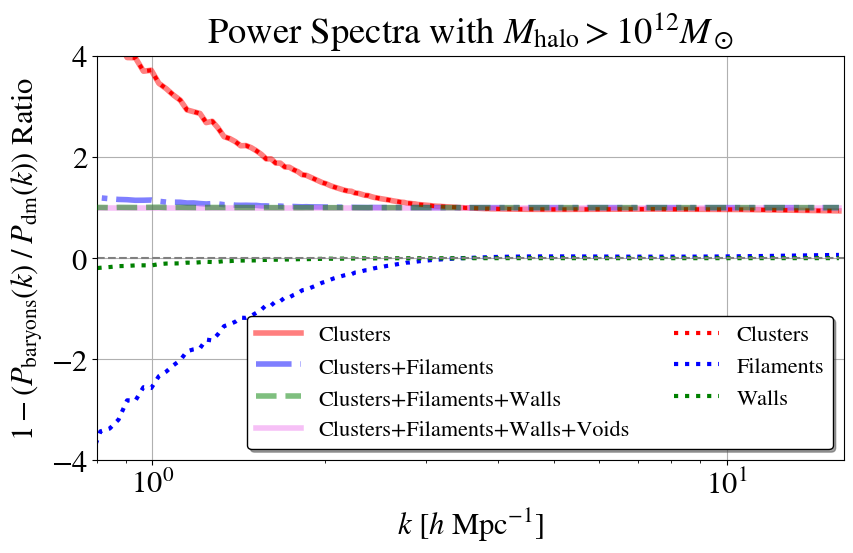

In [42]:
f, axes = plt.subplots(1,1, figsize=(9,6))


axes.plot((pk_clus['k']) * 1e3, x_cluster/x_everything, label='Clusters', color="red", alpha=0.5,linestyle="-", linewidth=4)

axes.plot((pk_fil['k']) * 1e3, x_cluster_fil/x_everything,
                                       label='Clusters+Filaments', color="blue", alpha=0.5, linestyle="-.",linewidth=4)

axes.plot((pk_wall['k']) * 1e3, x_cluster_fil_wall/x_everything,
                                        label='Clusters+Filaments+Walls', color="green", alpha=0.5, linestyle="--",linewidth=4, zorder=10)



axes.plot((full_pk_all['k']) * 1e3, (1 - ((((full_pk_all['power'].real - full_pk_all.attrs['shotnoise'])*1e-9) / 
                                      ((dm_pk_all['power'].real - dm_pk_all.attrs['shotnoise'])*1e-9))))/y,
                                       label='Clusters+Filaments+Walls+Voids', color="violet",alpha=0.5,linewidth=4) #Illustris units are kpc we need to convert to Mpc



axes.plot((pk_clus_iso['k']) * 1e3,x_clus_iso/x_everything ,
                                       label='Clusters', color="red", linestyle=":", linewidth=3)

axes.plot((pk_fil_iso['k']) * 1e3, x_fil_iso/x_everything ,
                                       label='Filaments', color="blue", linestyle=":",linewidth=3)

axes.plot((pk_wall_iso['k']) * 1e3, x_wall_iso/x_everything ,
                                        label='Walls', color="green", linestyle=":",linewidth=3)


axes.semilogx()
axes.grid()
axes.set_xlim(0.8e0, 1.6e1)
axes.set_ylim(-4,4)
# axes.set_ylim(-0.8, 0.1)
axes.axhline(y = 0, color = 'gray', linestyle = '--')
# axes.set_title("Isolated Replacement")
axes.set_xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]",fontsize=22)
axes.set_ylabel(r"$1 - (P_{\mathrm{baryons}}(k) \; / \; P_{\mathrm{dm}}(k))$ Ratio", fontsize=22)
# axes.set_ylabel(r"$x]", fontsize=22)


axes.legend(fontsize=16, shadow=True, ncol=2, edgecolor="black")
axes.set_title("Power Spectra with $M_{\\rm halo} > 10^{12} M_\odot$", pad=10)
f.tight_layout()
# plt.savefig("final_cross_correlation_plot.png", dpi=300)




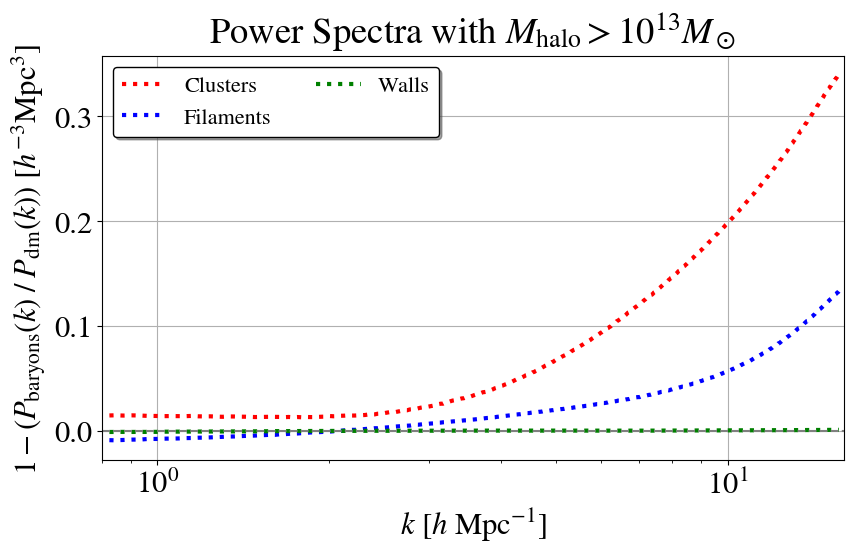

In [21]:
f, axes = plt.subplots(1,1, figsize=(9,6))


# axes.plot((pk_clus['k']) * 1e3, 1 - ((((pk_clus['power'].real - pk_clus.attrs['shotnoise'])*1e-9) / 
#                                        ((dm_pk_all['power'].real - dm_pk_all.attrs['shotnoise'])*1e-9))),
#                                        label='Clusters', color="red", alpha=0.5,linestyle="-", linewidth=4)

# axes.plot((pk_fil['k']) * 1e3, 1 - ((((pk_fil['power'].real - pk_fil.attrs['shotnoise'])*1e-9) / 
#                                       ((dm_pk_all['power'].real - dm_pk_all.attrs['shotnoise'])*1e-9))),
#                                        label='Clusters+Filaments', color="blue", alpha=0.5, linestyle="-.",linewidth=4)

# axes.plot((pk_wall['k']) * 1e3, 1 - ((((pk_wall['power'].real - pk_wall.attrs['shotnoise'])*1e-9) / 
#                                        ((dm_pk_all['power'].real - dm_pk_all.attrs['shotnoise'])*1e-9))),
#                                         label='Clusters+Filaments+Walls', color="green", alpha=0.5, linestyle="--",linewidth=4, zorder=10)



# axes.plot((full_pk_all['k']) * 1e3, 1 - ((((full_pk_all['power'].real - full_pk_all.attrs['shotnoise'])*1e-9) / 
#                                       ((dm_pk_all['power'].real - dm_pk_all.attrs['shotnoise'])*1e-9))),
#                                        label='Clusters+Filaments+Walls+Voids', color="violet",alpha=0.5,linewidth=4) #Illustris units are kpc we need to convert to Mpc



axes.plot((pk_clus_iso['k']) * 1e3, ((((pk_clus_iso['power'].real - pk_clus_iso.attrs['shotnoise'])*1e-9) / 
                                       ((dm_pk_all_iso['power'].real - dm_pk_all_iso.attrs['shotnoise'])*1e-9))),
                                       label='Clusters', color="red", linestyle=":", linewidth=3)

axes.plot((pk_fil_iso['k']) * 1e3, ((((pk_fil_iso['power'].real - pk_fil_iso.attrs['shotnoise'])*1e-9) / 
                                      ((dm_pk_all_iso['power'].real - dm_pk_all_iso.attrs['shotnoise'])*1e-9))),
                                       label='Filaments', color="blue", linestyle=":",linewidth=3)

axes.plot((pk_wall_iso['k']) * 1e3, ((((pk_wall_iso['power'].real - pk_wall_iso.attrs['shotnoise'])*1e-9) / 
                                       ((dm_pk_all_iso['power'].real - dm_pk_all_iso.attrs['shotnoise'])*1e-9))),
                                        label='Walls', color="green", linestyle=":",linewidth=3)


axes.semilogx()
axes.grid()
axes.set_xlim(0.8e0, 1.6e1)
# axes.set_ylim(-0.8, 0.1)
axes.axhline(y = 0, color = 'gray', linestyle = '--')
# axes.set_title("Isolated Replacement")
axes.set_xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]",fontsize=22)
axes.set_ylabel(r"$1 - (P_{\mathrm{baryons}}(k) \; / \; P_{\mathrm{dm}}(k)) $ [$h^{-3}\mathrm{Mpc}^3$]", fontsize=22)
axes.legend(fontsize=16, shadow=True, ncol=2, edgecolor="black")
axes.set_title("Power Spectra with $M_{\\rm halo} > 10^{13} M_\odot$", pad=10)
f.tight_layout()
# plt.savefig("final_cross_correlation_plot.png", dpi=300)

